# Data Preprocessing
Preprocess the dataset to prepare for EDAs and Modeling.
Key dataset:

*   **Temperature data:** 'temp data.xlsx', dir: /content/drive/Shareddrives/Data Mining Final Project Presentation Team E3/DataSets/CT Temp Data
*   **CT vaccination data:** 'Cum. Vaccination.csv', dir: /content/drive/Shareddrives/Data Mining Final Project Presentation Team E3/DataSets/CT Vaccination Data
*   **CT confirmed cases data:** 'COVID-19_Tests__Cases__Hospitalizations__and_Deaths__Statewide_.csv', dir: /content/drive/Shareddrives/Data Mining Final Project Presentation Team E3/DataSets/CT Cases Data
*   **Covid Variants (Add-ons):** 'CT Covid Variants.xlsx', dir: /content/drive/Shareddrives/Data Mining Final Project Presentation Team E3/DataSets/Covid Variants





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Merging, cleaning, and missing value imputation.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cd '/content/drive/Shareddrives/Data Mining Final Project Presentation Team E3/DataSets'

/content/drive/Shareddrives/Data Mining Final Project Presentation Team E3/DataSets


In [ ]:
# Load temperature data
df_temp = pd.read_excel('CT Temp Data/temp data.xlsx')
df_temp['YearMonthDay'] = pd.to_datetime(df_temp['YearMonthDay']) # Make sure the attribute is datetime
# Load CT vaccination data
df_vax = pd.read_csv('CT Vaccination Data/Cum. Vaccination.csv')
df_vax['Date'] = pd.to_datetime(df_vax['Date']) # Make sure the attribute is datetime
# Load the main dataset
df_main = pd.read_csv('CT Cases Data/COVID-19_Tests__Cases__Hospitalizations__and_Deaths__Statewide_.csv')
df_main['Date'] = pd.to_datetime(df_main['Date']) # Make sure the attribute is datetime
# Merge df_temp and df_vax
df_merge = df_temp.merge(df_vax, left_on='YearMonthDay', right_on='Date', how='outer')
df_CT = df_merge.merge(df_main, left_on='YearMonthDay', right_on='Date', how='left')
# Present the firt 5 rows of our merged dataset
df_CT.sort_values(by=['YearMonthDay'], inplace=True)
# Select relevant columns for the project
df_projectCT = df_CT[['YearMonthDay', 'At Obs.',
       'Population With At Least One Shot',
       'Population Series Complete', 'Population Boosted', 'Cases_per_day',
       'Deaths_per_day', 'cases_age0_9_per_day', 
       'cases_age10_19_per_day', 'cases_age20_29_per_day',
       'cases_age30_39_per_day', 
       'cases_age40_49_per_day', 'cases_age50_59_per_day',
       'cases_age60_69_per_day', 
       'cases_age70_79_per_day', 
       'cases_age80_Older_per_day']]
# Present our dataset
df_projectCT = df_projectCT.reset_index(drop=True)
df_projectCT = df_projectCT.iloc[23:767, :]
df_projectCT.reset_index(inplace=True, drop=True)
df_projectCT

,YearMonthDay,At Obs.,Population With At Least One Shot,Population Series Complete,Population Boosted,Cases_per_day,Deaths_per_day,cases_age0_9_per_day,cases_age10_19_per_day,cases_age20_29_per_day,cases_age30_39_per_day,cases_age40_49_per_day,cases_age50_59_per_day,cases_age60_69_per_day,cases_age70_79_per_day,cases_age80_Older_per_day
0,2020-03-24,33.000000,NaN,NaN,NaN,618.0,12.0,9.0,10.0,78.0,81.0,105.0,115.0,98.0,61.0,59.0
1,2020-03-25,35.000000,NaN,NaN,NaN,265.0,7.0,3.0,9.0,42.0,50.0,33.0,57.0,35.0,23.0,15.0
2,2020-03-26,35.000000,NaN,NaN,NaN,129.0,2.0,2.0,1.0,22.0,20.0,16.0,32.0,18.0,10.0,8.0
3,2020-03-27,49.000000,NaN,NaN,NaN,279.0,6.0,-3.0,3.0,26.0,41.0,36.0,71.0,49.0,30.0,26.0
4,2020-03-28,39.666667,NaN,NaN,NaN,233.0,6.0,4.0,12.0,24.0,38.0,41.0,51.0,28.0,20.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,2022-04-02,45.500000,94.7,78.4,51.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
740,2022-04-03,42.500000,94.7,78.5,51.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
741,2022-04-04,47.500000,94.7,78.5,51.1,1268.0,0.0,124.0,179.0,178.0,174.0,160.0,181.0,154.0,88.0,26.0
742,2022-04-05,46.500000,94.8,78.5,51.2,432.0,14.0,41.0,38.0,52.0,67.0,54.0,63.0,64.0,39.0,15.0


In [ ]:
# Explore missing values
df_projectCT.isnull().sum()
# We can see a lot of missing values in vaccinations. The first covid-19 vaccine was
# approved in FEB 2021. So, missing values before that date were explainable (and they should be filled with 0).
# For missing values of vaccination records after that date, they were imputed with the
# most recent vaccination data before the date the value was missed.

YearMonthDay                           0
At Obs.                                0
Population With At Least One Shot    327
Population Series Complete           327
Population Boosted                   332
Cases_per_day                        195
Deaths_per_day                       195
cases_age0_9_per_day                 195
cases_age10_19_per_day               195
cases_age20_29_per_day               195
cases_age30_39_per_day               195
cases_age40_49_per_day               195
cases_age50_59_per_day               195
cases_age60_69_per_day               195
cases_age70_79_per_day               195
cases_age80_Older_per_day            195
dtype: int64

In [ ]:
# MISSING VALUE INPUTATIONS
# For missing values of vaccination records, fill the value with the real value before it
df_projectCT.loc[:325, 'Population With At Least One Shot'].fillna(0, inplace=True)
df_projectCT['Population With At Least One Shot'].fillna(method='ffill', inplace=True)
df_projectCT.loc[:325, 'Population Series Complete'].fillna(0, inplace=True)
df_projectCT['Population Series Complete'].fillna(method='ffill', inplace=True)
df_projectCT.loc[:325, 'Population Boosted'].fillna(0, inplace=True)
df_projectCT['Population Boosted'].fillna(method='ffill', inplace=True)
# For missing values of confirmed cases, death cases, confirmed cases by age groups, impute the values
# with the averages of the three real values before it
list_ = ['Cases_per_day',
       'Deaths_per_day', 'cases_age0_9_per_day', 'cases_age10_19_per_day',
       'cases_age20_29_per_day', 'cases_age30_39_per_day',
       'cases_age40_49_per_day', 'cases_age50_59_per_day',
       'cases_age60_69_per_day', 'cases_age70_79_per_day',
       'cases_age80_Older_per_day']

for col in list_:
  dict_ = {item: [] for item in list_}
  index = df_projectCT[df_projectCT[col].isnull()].index # Scan through the null values for each target column
  for i in index:
    avg = np.nanmean(df_projectCT.loc[i-3:i, col])
    dict_[col].append(avg)
  df_projectCT.loc[index, col] = dict_[col] # Replace the null values with the averages for each target column
# Save the dataset to the repository
# df_projectCT.to_csv('forecasting_project_CT.csv')
# Present our dataset
df_projectCT

,YearMonthDay,At Obs.,Population With At Least One Shot,Population Series Complete,Population Boosted,Cases_per_day,Deaths_per_day,cases_age0_9_per_day,cases_age10_19_per_day,cases_age20_29_per_day,cases_age30_39_per_day,cases_age40_49_per_day,cases_age50_59_per_day,cases_age60_69_per_day,cases_age70_79_per_day,cases_age80_Older_per_day
0,2020-03-24,33.000000,0.0,0.0,0.0,618.0,12.0,9.000000,10.0,78.000000,81.0,105.000000,115.000000,98.000000,61.000000,59.000000
1,2020-03-25,35.000000,0.0,0.0,0.0,265.0,7.0,3.000000,9.0,42.000000,50.0,33.000000,57.000000,35.000000,23.000000,15.000000
2,2020-03-26,35.000000,0.0,0.0,0.0,129.0,2.0,2.000000,1.0,22.000000,20.0,16.000000,32.000000,18.000000,10.000000,8.000000
3,2020-03-27,49.000000,0.0,0.0,0.0,279.0,6.0,-3.000000,3.0,26.000000,41.0,36.000000,71.000000,49.000000,30.000000,26.000000
4,2020-03-28,39.666667,0.0,0.0,0.0,233.0,6.0,4.000000,12.0,24.000000,38.0,41.000000,51.000000,28.000000,20.000000,15.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,2022-04-02,45.500000,94.7,78.4,51.1,567.0,0.0,74.666667,91.0,80.666667,84.0,65.333333,72.333333,54.333333,28.666667,16.333333
740,2022-04-03,42.500000,94.7,78.5,51.1,621.5,0.0,91.500000,116.5,76.000000,85.0,72.000000,76.500000,55.000000,29.500000,20.000000
741,2022-04-04,47.500000,94.7,78.5,51.1,1268.0,0.0,124.000000,179.0,178.000000,174.0,160.000000,181.000000,154.000000,88.000000,26.000000
742,2022-04-05,46.500000,94.8,78.5,51.2,432.0,14.0,41.000000,38.0,52.000000,67.0,54.000000,63.000000,64.000000,39.000000,15.000000


In [ ]:
# Check again if the dataset is clean
df_projectCT.isnull().sum()
# Great news! The dataset is clean!

YearMonthDay                         0
At Obs.                              0
Population With At Least One Shot    0
Population Series Complete           0
Population Boosted                   0
Cases_per_day                        0
Deaths_per_day                       0
cases_age0_9_per_day                 0
cases_age10_19_per_day               0
cases_age20_29_per_day               0
cases_age30_39_per_day               0
cases_age40_49_per_day               0
cases_age50_59_per_day               0
cases_age60_69_per_day               0
cases_age70_79_per_day               0
cases_age80_Older_per_day            0
dtype: int64

## Key variable overview

In [ ]:
# TIME SERIES OF CASES OVERVIEW
import plotly.express as px
fig = px.line(df_projectCT, x='YearMonthDay', y='Cases_per_day', 
              title='Time Series of Confirmed Cases')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

## Key variable trends smoothening
We do smoothening for visualization purposes.

In [ ]:
# Copy the data frame and save it to df_projectCT_s
df_projectCT_s = df_projectCT.copy()
list_ = df_projectCT_s.columns
# Smoothen all variable trend using seven-day moving averages
for col in list_[1:]:
  dict_ = {item: [] for item in list_}
  for i in range(0, len(df_projectCT_s)):
    avg = np.mean(df_projectCT_s.loc[i-7:i, col])
    dict_[col].append(avg)
  df_projectCT_s[col] = dict_[col]
# Save a copy to the repository
# df_projectCT_s.to_csv('s_forecasting_project_CT.csv')
df_projectCT_s.columns

Index(['YearMonthDay', 'At Obs.', 'Population With At Least One Shot',
       'Population Series Complete', 'Population Boosted', 'Cases_per_day',
       'Deaths_per_day', 'cases_age0_9_per_day', 'cases_age10_19_per_day',
       'cases_age20_29_per_day', 'cases_age30_39_per_day',
       'cases_age40_49_per_day', 'cases_age50_59_per_day',
       'cases_age60_69_per_day', 'cases_age70_79_per_day',
       'cases_age80_Older_per_day'],
      dtype='object')

## Key variable overview (smoothened)

In [ ]:
# TIME SERIES OF CASES OVERVIEW, with age-group, 0-9 (smoothened)
import plotly.express as px
fig = px.area(df_projectCT_s, x='YearMonthDay', y='Cases_per_day',
              title='Time Series of Confirmed Cases (smoothened)')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

# Exploratory Data Analysis
Visualize the data to learn covid stories.

## 1. Time series analysis: confirmed cases vs confirmed cases (stacked) by age groups

In [ ]:
# Stack confirmed cases date age group by age agroup

fig = px.area(df_projectCT_s, x='YearMonthDay', y=['cases_age0_9_per_day', 'cases_age10_19_per_day',
       'cases_age20_29_per_day', 'cases_age30_39_per_day',
       'cases_age40_49_per_day', 'cases_age50_59_per_day',
       'cases_age60_69_per_day', 'cases_age70_79_per_day',
       'cases_age80_Older_per_day'], 
              title='Time Series of Confirmed Cases by Age Group (smoothened)')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

## 2. Time vs Confirmed cases by age groups -- Henry
Heatmaps recommended.

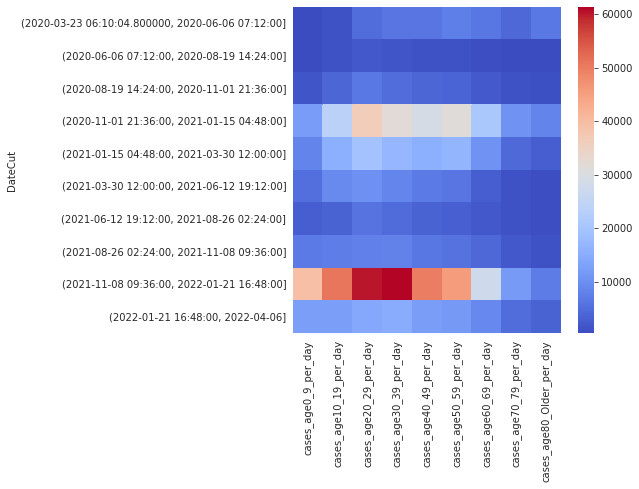

In [ ]:
# Copy the dataset df_projectCT for graphing heatmap
df_heatmap = df_projectCT.copy()
# "Cut" the time variable into "slices"
date_cut = pd.cut(df_heatmap['YearMonthDay'], 10)
df_heatmap['DateCut'] = date_cut
# Select columns for the heatmap
df_heatmap = df_heatmap[['DateCut', 'cases_age0_9_per_day', 'cases_age10_19_per_day',
       'cases_age20_29_per_day', 'cases_age30_39_per_day',
       'cases_age40_49_per_day', 'cases_age50_59_per_day',
       'cases_age60_69_per_day', 'cases_age70_79_per_day',
       'cases_age80_Older_per_day']].set_index('DateCut')
df_heatmap = df_heatmap.groupby(by='DateCut').sum()
# Set parameters for the graphing
with sns.axes_style('white'):
     f, ax = plt.subplots(figsize=(6, 6))
     ax = sns.heatmap(df_heatmap, square=False,
                      xticklabels='auto', yticklabels='auto', cmap='coolwarm')


Pie chart recommended (% of cases of each age groups)

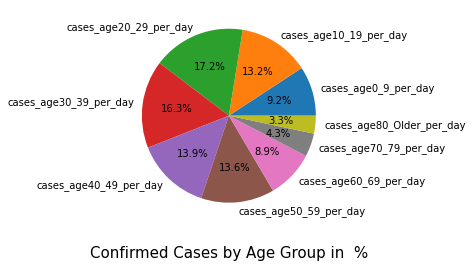

In [ ]:
# Use a pie chart to summarize the confirmed cases
col_ = ['cases_age0_9_per_day', 'cases_age10_19_per_day',
       'cases_age20_29_per_day', 'cases_age30_39_per_day',
       'cases_age40_49_per_day', 'cases_age50_59_per_day',
       'cases_age60_69_per_day', 'cases_age70_79_per_day',
       'cases_age80_Older_per_day']
df_sum = pd.Series({str(col): df_projectCT[col].sum() for col in col_})
plt.pie(data=df_sum, x=df_sum, labels=df_sum.index, autopct='%1.1f%%')
plt.xlabel('\nConfirmed Cases by Age Group in  %', fontsize=15)
plt.show()

## 3. Time series analysis: vaccination records, vaccination records by age groups (stacked) -- Henry

Data set: 'COVID-19_Vaccinations_by_Town_and_Age_Group', dir: /content/drive/Shareddrives/Data Mining Final Project Presentation Team E3/DataSets/CT Vaccination Data/Raw Datam



Bar chart recommended to visualize vaccination rate for each age group.

In [ ]:
# Import the raw vaccination data
df_vax_raw = pd.read_excel('CT Vaccination Data/Raw Data/COVID-19_Vaccinations_by_Age_Group.xlsx')

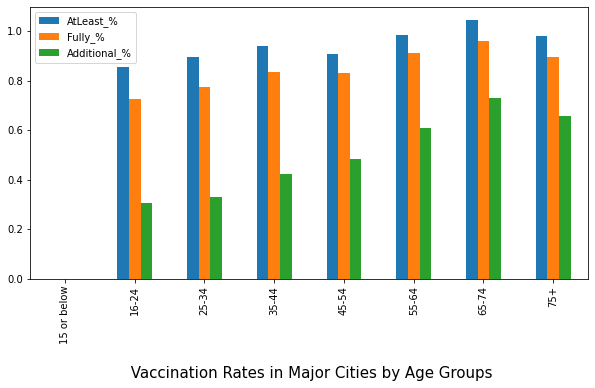

In [ ]:
# VACCINATION RATE OVERVIEW IN A BAR CHART
# Column names cleaning
df_vax_raw.columns = [i.strip(' ') for i in df_vax_raw.columns]
df_vax_raw.rename(columns={'At least one dose': 'AtLeast one dose', 
                           'At least one dose_per_day': 'AtLeast one dose_per_day'}, inplace=True)
# Sum relevant values up for each unique age group
df_BarChart = df_vax_raw[['Age group', 'Population', 'AtLeast one dose_per_day', 
                          'Fully Vaccinated_per_day', 'Additional Dose Received Count_per_day' 
                          ]].groupby(by='Age group').agg({'Population': 'mean', 'AtLeast one dose_per_day': 'sum', 
                          'Fully Vaccinated_per_day': 'sum', 'Additional Dose Received Count_per_day': 'sum'})
# Drop rows of the anormaly
df_BarChart.drop(['<2', '<5', 'Age unknown', 'Unknown'], axis=0, inplace=True)
# Calculate vaccination rate for each each group
for col in ['AtLeast one dose_per_day', 
                          'Fully Vaccinated_per_day', 'Additional Dose Received Count_per_day']:
  col_name = col.split(' ')[0] + '_%'
  df_BarChart[col_name] = df_BarChart[col]/df_BarChart['Population']
# Visualize the vaccination rates
df_BarChart.iloc[:,4:].plot.bar(figsize=(10,5))
plt.xlabel('\n Vaccination Rates in Major Cities by Age Groups', fontsize=15)
plt.show()

Time series recommended to visualize the vaccination trend.

In [ ]:
# TIME SERIES ANALYSIS FOR THE VACCINATION RECORDS
# Copy the dateset, df_vax_raw, for the TS analysis
df_vax_TimeSeries = df_vax_raw.copy()
df_vax_date = df_vax_TimeSeries[['AtLeast one dose_per_day', 'Fully Vaccinated_per_day',
       'Additional Dose Received Count_per_day', 'Age group', 'Date']]
# Make sure the "Date" column is of datetime value
df_vax_date['Date'] = pd.to_datetime(df_vax_date['Date'])
# Merge the dataset with temperature dataset so that we have the complete calendar 
df_vax_date = df_vax_date.merge(df_projectCT['YearMonthDay'], 
                                left_on='Date', right_on='YearMonthDay', how='right')
df_vax_date.sort_values('YearMonthDay', inplace=True)
df_vax_date.reset_index(drop=True, inplace=True)
# Fill in missing values with 0s
list_ = ['AtLeast one dose_per_day', 
       'Fully Vaccinated_per_day',
       'Additional Dose Received Count_per_day']

for col in list_:
  df_vax_date.loc[:,col].fillna(0, inplace=True)

fig = px.line(df_vax_date, x='YearMonthDay', y='AtLeast one dose_per_day',
              title='Time Series of First-dose Vaccination')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# TIME SERIES ANALYSIS FOR THE VACCINATION RECORDS -- STACKED
# Save first-dose vaccination records for different age groups, and of course, time, as variables
df_1 = df_vax_TimeSeries[df_vax_TimeSeries['Age group'] == '16-24'].loc[:, ['Date', 'AtLeast one dose_per_day']]
df_1.rename(columns={'AtLeast one dose_per_day': '16-24'}, inplace=True)
df_2 = df_vax_TimeSeries[df_vax_TimeSeries['Age group'] == '25-34'].loc[:, ['Date', 'AtLeast one dose_per_day']]
df_2.rename(columns={'AtLeast one dose_per_day': '25-34'}, inplace=True)
df_3 = df_vax_TimeSeries[df_vax_TimeSeries['Age group'] == '35-44'].loc[:, ['Date', 'AtLeast one dose_per_day']]
df_3.rename(columns={'AtLeast one dose_per_day': '35-44'}, inplace=True)
df_4 = df_vax_TimeSeries[df_vax_TimeSeries['Age group'] == '45-54'].loc[:, ['Date', 'AtLeast one dose_per_day']]
df_4.rename(columns={'AtLeast one dose_per_day': '45-54'}, inplace=True)
df_5 = df_vax_TiTmeSeries[df_vax_TimeSeries['Age group'] == '55-64'].loc[:, ['Date', 'AtLeast one dose_per_day']]
df_5.rename(columns={'AtLeast one dose_per_day': '55-64'}, inplace=True)
df_6 = df_vax_TimeSeries[df_vax_TimeSeries['Age group'] == '65-74'].loc[:, ['Date', 'AtLeast one dose_per_day']]
df_6.rename(columns={'AtLeast one dose_per_day': '65-74'}, inplace=True)
df_7 = df_vax_TimeSeries[df_vax_TimeSeries['Age group'] == '75+'].loc[:, ['Date', 'AtLeast one dose_per_day']]
df_7.rename(columns={'AtLeast one dose_per_day': '75+'}, inplace=True)

df_ts_stack = df_1.merge(df_2, on='Date', how='outer')
df_ts_stack = df_ts_stack.merge(df_3, on='Date', how='outer')
df_ts_stack = df_ts_stack.merge(df_4, on='Date', how='outer')
df_ts_stack = df_ts_stack.merge(df_5, on='Date', how='outer')
df_ts_stack = df_ts_stack.merge(df_6, on='Date', how='outer')
df_ts_stack = df_ts_stack.merge(df_7, on='Date', how='outer')
# Merge with temperature dataset again to make sure we have the complete calendar
df_ts_stack = df_ts_stack.merge(df_projectCT['YearMonthDay'], 
                                left_on='Date', right_on='YearMonthDay', how='right')
# Fill in missing values with 0s
df_ts_stack.fillna(0, inplace=True)

list_ = df_ts_stack.columns[1:8]

# Smoothen the trends with 31-day moving averages again
dict_ = {col: [] for col in list_}
for col in list_:
  for i in range(0, len(df_ts_stack)):
      avg = np.nanmean(df_ts_stack.loc[i-31:i, col])
      dict_[col].append(avg)
  df_ts_stack.loc[:, col] = dict_[col]

# Finally! Visualize the staked times series!
fig = px.area(df_ts_stack, x='YearMonthDay', y=['16-24', '25-34', '35-44', 
                           '45-54', '55-64', '65-74', '75+'],
              title='Time Series of First-dose Vaccination by Age Group (smoothened)')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

## 4. Vaccination records vs age groups by time -- Henry
Heatmaps recommended.

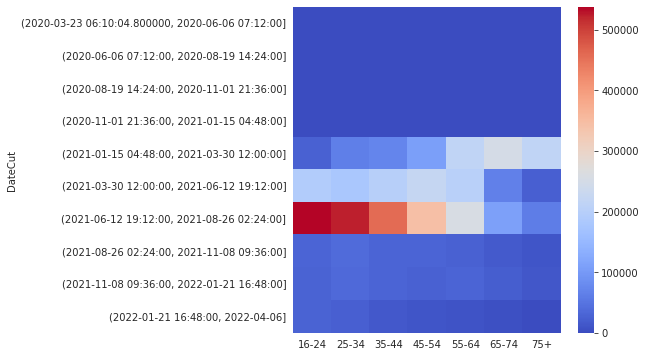

In [ ]:
# Copy the dataset df_ts_stack for graphing heatmap
df_eda4 = df_ts_stack.copy()
# "Cut" the time variable into "slices"
date_cut = pd.cut(df_eda4['YearMonthDay'], 10)
df_eda4['DateCut'] = date_cut
# Select columns for the heatmap
df_heatmap_eda4 = df_eda4[['DateCut', '16-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75+']].set_index('DateCut')
df_heatmap_eda4 = df_eda4.groupby(by='DateCut').sum()
# Set parameters for the graphing
with sns.axes_style('white'):
     f, ax = plt.subplots(figsize=(6, 6))
     ax = sns.heatmap(df_heatmap_eda4, square=False,
                      xticklabels='auto', yticklabels='auto', cmap='coolwarm')


## 5. Confirmed cases, death cases vs temperature -- Monica
Heatmaps resommended.

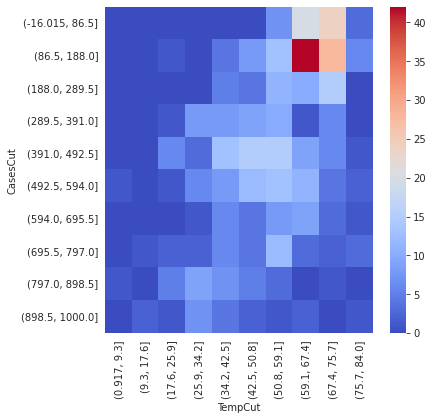

In [ ]:
# Copy the dataset df_ts_stack for graphing heatmap
df_eda5 = df_projectCT.copy()
# "Cut" the time variable into "slices"
cut_temp = pd.cut(df_eda5['At Obs.'], 10)
df_eda5['TempCut'] = cut_temp

# High temperature tends to lead to low cases. For confirmed cases <=1000, draw heatmap
cut_cases = pd.cut(df_eda5[df_eda5['Cases_per_day']<=1000]['Cases_per_day'], 10)
df_eda5['CasesCut'] = cut_cases

# Select columns for the heatmap
df_heatmap_eda5 = df_eda5[['TempCut', 'CasesCut']]

# Summarize the data frame into a cross table
crosstable_eda5 = pd.crosstab(df_eda5['CasesCut'], df_eda5['TempCut'])

with sns.axes_style('white'):
     f, ax = plt.subplots(figsize=(6, 6))
     ax = sns.heatmap(crosstable_eda5, square=False,
                      xticklabels='auto', yticklabels='auto', cmap='coolwarm')

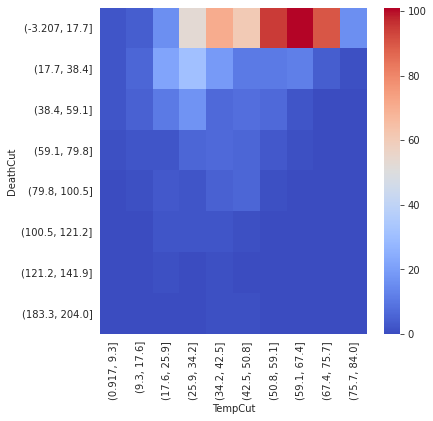

In [ ]:
# "Cut" the time variable into "slices"
cut_death = pd.cut(df_eda5['Deaths_per_day'], 10)
df_eda5['DeathCut'] = cut_death

# Select columns for the heatmap
df_heatmap_eda5 = df_eda5[['TempCut', 'DeathCut']]

# Summarize the data frame into a cross table
crosstable_eda5 = pd.crosstab(df_eda5['DeathCut'], df_eda5['TempCut'])

with sns.axes_style('white'):
     f, ax = plt.subplots(figsize=(6, 6))
     ax = sns.heatmap(crosstable_eda5, square=False,
                      xticklabels='auto', yticklabels='auto', cmap='coolwarm')

## 6. Time vs Death cases -- Monica

Time series recommended.

In [ ]:
# Death cases TS 
fig = px.area(df_projectCT_s, x='YearMonthDay', y='Deaths_per_day',
              title='Time Series of Deaths Per Day (smoothened)')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

## 7. Cummulative trend vs First dose, second dose, and boosted (stacked) -- Jason

In [ ]:
# Prepare a data frame for this section
df_eda7 = df_projectCT.copy()
df_eda7 = df_projectCT[['YearMonthDay', 'Population With At Least One Shot', 'Population Series Complete', 'Population Boosted']]
df_eda7['At Least One Shot'] = df_eda7.loc[:,'Population With At Least One Shot'] - df_eda7.loc[:,'Population Series Complete']
df_eda7['Fully Vaccinated'] = df_eda7.loc[:,'Population Series Complete'] - df_eda7.loc[:,'Population Boosted']

fig = px.area(df_eda7, x='YearMonthDay', y=['Population Boosted', 'Fully Vaccinated', 'At Least One Shot'],
              title='Time Series of Vaccination Rates')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## 8. Number of vax vs First dose, second dose, and boosted (stacked) -- Rachel

Data set: 'COVID-19_Vaccinations_by_Town_and_Age_Group', dir: /content/drive/Shareddrives/Data Mining Final Project Presentation Team E3/DataSets/CT Vaccination Data/Raw Data

In [ ]:
df_eda8 = df_vax_date.copy()
df_eda8 = df_eda8[['YearMonthDay', 'AtLeast one dose_per_day', 'Fully Vaccinated_per_day',
       'Additional Dose Received Count_per_day']]
df_eda8 = df_eda8.groupby(by='YearMonthDay').agg({'AtLeast one dose_per_day': 'sum', 'Fully Vaccinated_per_day': 'sum',
       'Additional Dose Received Count_per_day': 'sum'})
df_eda8.reset_index(inplace=True)


# Smoothen the trends with 31-day moving averages
dict_ = {col: [] for col in df_eda8.columns[1:]}
for col in dict_:
  for i in range(0, len(df_eda8)):
      avg = np.mean(df_eda8.loc[i-31:i, col])
      dict_[col].append(avg)
  df_eda8.loc[:, col] = dict_[col]

fig = px.area(df_eda8, x=df_eda8['YearMonthDay'], y=['Additional Dose Received Count_per_day',
                                           'Fully Vaccinated_per_day',
                                           'AtLeast one dose_per_day'
       ],
              title='Time Series of Vaccination Records (smoothened)')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

## 9. Variants (Add-ons)
The dataset for this section was preprocessed by Outbreak.info with 7-day moving averages. Please refer to: https://outbreak.info/location-reports?loc=USA_US-CT

*   Number of infections per day: Omicron>Delta>Alpha
*   Number of deaths per day: Omicron>Delta>Alpha




In [ ]:
# Import the dataset
df_variants = pd.read_excel('Covid Variants/CT Covid Variants.xlsx')

# An overview of the data
# The most recent and prominent variant: Omicron
fig = px.line(df_variants, x=df_variants['Date'], y=['Alpha', 'Gemma', 'Beta', 'Delta', 'Omicron'
       ],
              title='The Proportion of Covid Variants to Confirmed Cases during the Pandemic')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

### 1. Alpha vs Confirmed cases/Deaths

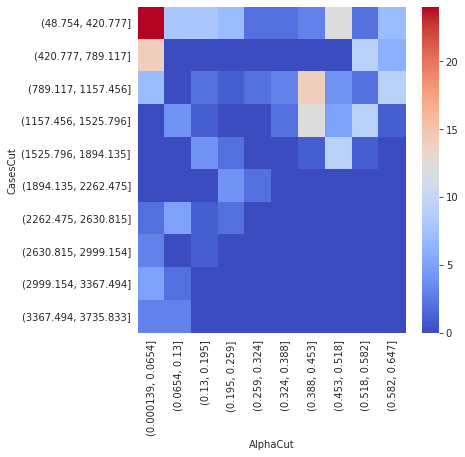

In [ ]:
# PLEASE RUN THE TIME SERIES FORECASTING SECTION FIRST!!!!
# Copy the dataset df_ts_stack for graphing heatmap
df_eda9_alpha = m_df_ts_full.copy()
df_eda9_alpha = df_eda9_alpha[df_eda9_alpha['Alpha']>0]
# "Cut" the time variable into "slices"
cut_cases = pd.cut(df_eda9_alpha['Cases_per_day'], 10)
df_eda9_alpha['CasesCut'] = cut_cases

# High temperature tends to lead to low cases. For confirmed cases <=1000, draw heatmap
cut_alpha = pd.cut(df_eda9_alpha['Alpha'], 10)
df_eda9_alpha['AlphaCut'] = cut_alpha

# Summarize the data frame into a cross table
crosstable_alpha1 = pd.crosstab(df_eda9_alpha['CasesCut'], df_eda9_alpha['AlphaCut'])

with sns.axes_style('white'):
     f, ax = plt.subplots(figsize=(6, 6))
     ax = sns.heatmap(crosstable_alpha1, square=False,
                      xticklabels='auto', yticklabels='auto', cmap='coolwarm')

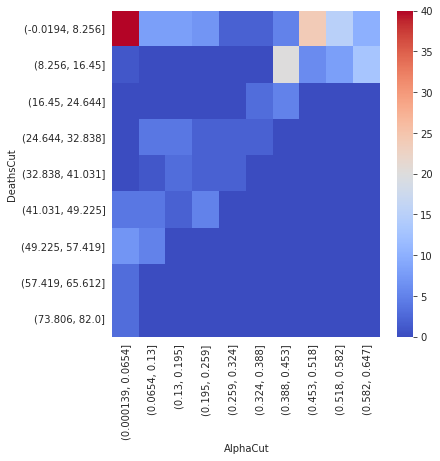

In [ ]:
# PLEASE RUN THE TIME SERIES FORECASTING SECTION FIRST!!!!
# Copy the dataset df_ts_stack for graphing heatmap
df_eda9_alpha = m_df_ts_full.copy()
df_eda9_alpha = df_eda9_alpha[df_eda9_alpha['Alpha']>0]
# "Cut" the Deaths variable into "slices"
cut_Deaths = pd.cut(df_eda9_alpha['Deaths_per_day'], 10)
df_eda9_alpha['DeathsCut'] = cut_Deaths

cut_alpha = pd.cut(df_eda9_alpha['Alpha'], 10)
df_eda9_alpha['AlphaCut'] = cut_alpha

# Summarize the data frame into a cross table
crosstable_alpha2 = pd.crosstab(df_eda9_alpha['DeathsCut'], df_eda9_alpha['AlphaCut'])

with sns.axes_style('white'):
     f, ax = plt.subplots(figsize=(6, 6))
     ax = sns.heatmap(crosstable_alpha2, square=False,
                      xticklabels='auto', yticklabels='auto', cmap='coolwarm')

### 2. Delta vs Confirmed cases/Deaths

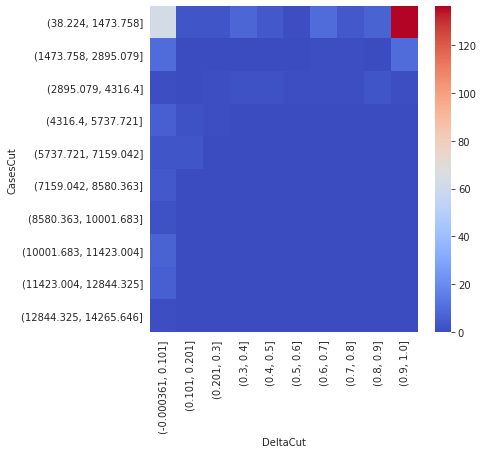

In [ ]:
# PLEASE RUN THE TIME SERIES FORECASTING SECTION FIRST!!!!
# Copy the dataset df_ts_stack for graphing heatmap
df_eda9_delta = m_df_ts_full.copy()
df_eda9_delta = df_eda9_delta[df_eda9_delta['Delta']>0]
# "Cut" the cases variable into "slices"
cut_Deaths = pd.cut(df_eda9_delta['Cases_per_day'], 10)
df_eda9_delta['CasesCut'] = cut_Deaths

cut_delta = pd.cut(df_eda9_delta['Delta'], 10)
df_eda9_delta['DeltaCut'] = cut_delta

# Summarize the data frame into a cross table
crosstable_delta1 = pd.crosstab(df_eda9_delta['CasesCut'], df_eda9_delta['DeltaCut'])

with sns.axes_style('white'):
     f, ax = plt.subplots(figsize=(6, 6))
     ax = sns.heatmap(crosstable_delta1, square=False,
                      xticklabels='auto', yticklabels='auto', cmap='coolwarm')

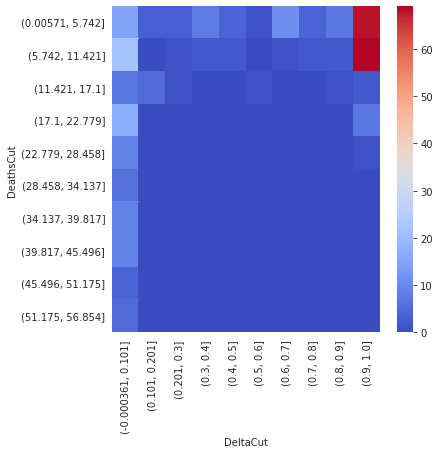

In [ ]:
# PLEASE RUN THE TIME SERIES FORECASTING SECTION FIRST!!!!
# Copy the dataset df_ts_stack for graphing heatmap
df_eda9_delta = m_df_ts_full.copy()
df_eda9_delta = df_eda9_delta[df_eda9_delta['Delta']>0]
# "Cut" the cases variable into "slices"
cut_Deaths = pd.cut(df_eda9_delta['Deaths_per_day'], 10)
df_eda9_delta['DeathsCut'] = cut_Deaths

cut_delta = pd.cut(df_eda9_delta['Delta'], 10)
df_eda9_delta['DeltaCut'] = cut_delta

# Summarize the data frame into a cross table
crosstable_delata2 = pd.crosstab(df_eda9_delta['DeathsCut'], df_eda9_delta['DeltaCut'])

with sns.axes_style('white'):
     f, ax = plt.subplots(figsize=(6, 6))
     ax = sns.heatmap(crosstable_delata2, square=False,
                      xticklabels='auto', yticklabels='auto', cmap='coolwarm')

### 3. Omicron vs Confirmed cases/Deaths

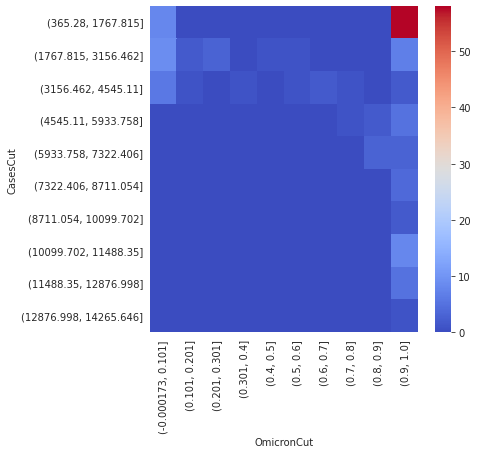

In [ ]:
# PLEASE RUN THE TIME SERIES FORECASTING SECTION FIRST!!!!
# Copy the dataset df_ts_stack for graphing heatmap
df_eda9_omicron = m_df_ts_full.copy()
df_eda9_omicron = df_eda9_omicron[df_eda9_omicron['Omicron']>0]
# "Cut" the cases variable into "slices"
cut_Deaths = pd.cut(df_eda9_omicron['Cases_per_day'], 10)
df_eda9_omicron['CasesCut'] = cut_Deaths

cut_delta = pd.cut(df_eda9_omicron['Omicron'], 10)
df_eda9_omicron['OmicronCut'] = cut_delta

# Summarize the data frame into a cross table
crosstable_omicron1 = pd.crosstab(df_eda9_omicron['CasesCut'], df_eda9_omicron['OmicronCut'])

with sns.axes_style('white'):
     f, ax = plt.subplots(figsize=(6, 6))
     ax = sns.heatmap(crosstable_omicron1, square=False,
                      xticklabels='auto', yticklabels='auto', cmap='coolwarm')

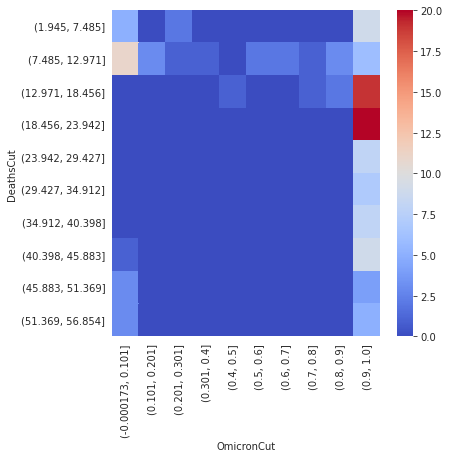

In [ ]:
# PLEASE RUN THE TIME SERIES FORECASTING SECTION FIRST!!!!
# Copy the dataset df_ts_stack for graphing heatmap
df_eda9_omicron = m_df_ts_full.copy()
df_eda9_omicron = df_eda9_omicron[df_eda9_omicron['Omicron']>0]
# "Cut" the cases variable into "slices"
cut_Deaths = pd.cut(df_eda9_omicron['Deaths_per_day'], 10)
df_eda9_omicron['DeathsCut'] = cut_Deaths

cut_delta = pd.cut(df_eda9_omicron['Omicron'], 10)
df_eda9_omicron['OmicronCut'] = cut_delta

# Summarize the data frame into a cross table
crosstable_omicron2 = pd.crosstab(df_eda9_omicron['DeathsCut'], df_eda9_omicron['OmicronCut'])

with sns.axes_style('white'):
     f, ax = plt.subplots(figsize=(6, 6))
     ax = sns.heatmap(crosstable_omicron2, square=False,
                      xticklabels='auto', yticklabels='auto', cmap='coolwarm')

# Time series forecasting
**For our procedures in SAS**, please refer to our SAS memorandum: https://docs.google.com/document/d/1q-daA1ehyhkXVlX6nIb1F0dmNrGDflfj/edit?usp=sharing&ouid=114200681388729193508&rtpof=true&sd=true
## Feature selection
Select top features by looking at variable coefficients.

In [ ]:
# Turn demographic vaccination records into variables
m_df_1 = df_vax_TimeSeries[df_vax_TimeSeries['Age group'] == '16-24'].loc[:, ['Date', 'Fully Vaccinated Percent', 'Additional Dose Received Percent']]
m_df_1.rename(columns={'Fully Vaccinated Percent': 'FullyVax_16-24', 'Additional Dose Received Percent': 'Boosted_16-24'}, inplace=True)
m_df_1 = m_df_1.groupby(by='Date').mean()
m_df_2 = df_vax_TimeSeries[df_vax_TimeSeries['Age group'] == '25-34'].loc[:, ['Date', 'Fully Vaccinated Percent', 'Additional Dose Received Percent']]
m_df_2.rename(columns={'Fully Vaccinated Percent': 'FullyVax_25-34', 'Additional Dose Received Percent': 'Boosted_25-34'}, inplace=True)
m_df_2 = m_df_2.groupby(by='Date').mean()
m_df_3 = df_vax_TimeSeries[df_vax_TimeSeries['Age group'] == '35-44'].loc[:, ['Date', 'Fully Vaccinated Percent', 'Additional Dose Received Percent']]
m_df_3.rename(columns={'Fully Vaccinated Percent': 'FullyVax_35-44', 'Additional Dose Received Percent': 'Boosted_35-44'}, inplace=True)
m_df_3 = m_df_3.groupby(by='Date').mean()
m_df_4 = df_vax_TimeSeries[df_vax_TimeSeries['Age group'] == '45-54'].loc[:, ['Date', 'Fully Vaccinated Percent', 'Additional Dose Received Percent']]
m_df_4.rename(columns={'Fully Vaccinated Percent': 'FullyVax_45-54', 'Additional Dose Received Percent': 'Boosted_45-54'}, inplace=True)
m_df_4 = m_df_4.groupby(by='Date').mean()
m_df_5 = df_vax_TimeSeries[df_vax_TimeSeries['Age group'] == '55-64'].loc[:, ['Date', 'Fully Vaccinated Percent', 'Additional Dose Received Percent']]
m_df_5.rename(columns={'Fully Vaccinated Percent': 'FullyVax_55-64', 'Additional Dose Received Percent': 'Boosted_55-64'}, inplace=True)
m_df_5 = m_df_5.groupby(by='Date').mean()
m_df_6 = df_vax_TimeSeries[df_vax_TimeSeries['Age group'] == '65-74'].loc[:, ['Date', 'Fully Vaccinated Percent', 'Additional Dose Received Percent']]
m_df_6.rename(columns={'Fully Vaccinated Percent': 'FullyVax_65-74', 'Additional Dose Received Percent': 'Boosted_65-74'}, inplace=True)
m_df_6 = m_df_6.groupby(by='Date').mean()
m_df_7 = df_vax_TimeSeries[df_vax_TimeSeries['Age group'] == '75+'].loc[:, ['Date', 'Fully Vaccinated Percent', 'Additional Dose Received Percent']]
m_df_7.rename(columns={'Fully Vaccinated Percent': 'FullyVax_75+', 'Additional Dose Received Percent': 'Boosted_75+'}, inplace=True)
m_df_7 = m_df_7.groupby(by='Date').mean()

m_df_ts = m_df_1.merge(m_df_2, on='Date', how='outer')
m_df_ts = m_df_ts.merge(m_df_3, on='Date', how='outer')
m_df_ts = m_df_ts.merge(m_df_4, on='Date', how='outer')
m_df_ts = m_df_ts.merge(m_df_5, on='Date', how='outer')
m_df_ts = m_df_ts.merge(m_df_6, on='Date', how='outer')
m_df_ts = m_df_ts.merge(m_df_7, on='Date', how='outer')
# Merge with temperature dataset again to make sure we have the complete calendar
m_df_ts = m_df_ts.merge(df_projectCT_s['YearMonthDay'], 
                                left_on='Date', right_on='YearMonthDay', how='right')
# Fill in missing values with 0s
for col in m_df_ts.columns:
  m_df_ts.loc[0:316, col].fillna(0, inplace=True)

# Combine all information
for col in m_df_ts.columns:
  m_df_ts.loc[:, col].fillna(method='ffill', inplace=True)

m_df_ts_full = pd.concat([df_projectCT_s, m_df_ts.iloc[:, :-1], df_variants.iloc[:,1:]], axis=1)

m_df_ts_full.tail()



,YearMonthDay,At Obs.,Population With At Least One Shot,Population Series Complete,Population Boosted,Cases_per_day,Deaths_per_day,cases_age0_9_per_day,cases_age10_19_per_day,cases_age20_29_per_day,...,Boosted_55-64,FullyVax_65-74,Boosted_65-74,FullyVax_75+,Boosted_75+,Alpha,Gemma,Beta,Delta,Omicron
739,2022-04-02,40.6875,94.5875,78.3750,50.8875,562.791667,4.395833,59.666667,78.104167,82.229167,...,60.5,95.8,72.6,89.4,65.5,0.0,0.0,0.0,0.0,1.000000
740,2022-04-03,39.9375,94.6125,78.4000,50.9375,587.812500,3.687500,66.895833,86.625000,83.145833,...,60.5,95.8,72.6,89.4,65.5,0.0,0.0,0.0,0.0,1.000000
741,2022-04-04,41.2500,94.6375,78.4250,50.9875,692.062500,2.500000,78.395833,102.312500,96.583333,...,60.5,95.8,72.6,89.4,65.5,0.0,0.0,0.0,0.0,1.000000
742,2022-04-05,43.8125,94.6625,78.4375,51.0375,619.312500,4.250000,73.520833,92.187500,84.083333,...,60.5,95.8,72.6,89.4,65.5,0.0,0.0,0.0,0.0,1.000000
743,2022-04-06,46.1250,94.6875,78.4500,51.0750,633.437500,2.000000,74.020833,91.562500,89.083333,...,60.8,96.0,73.0,89.6,65.8,0.0,0.0,0.0,0.0,0.998423


In [ ]:
len(m_df_ts_full.columns)

35

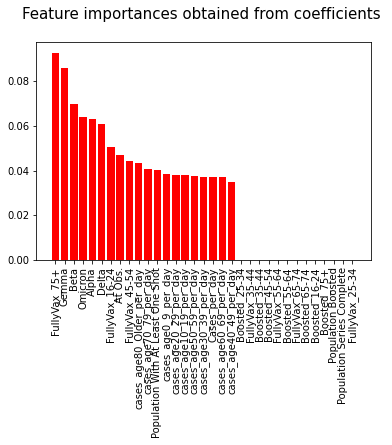

In [ ]:
# Select predicting variables
m_df_ts_full_dep = m_df_ts_full[['At Obs.', 'Population With At Least One Shot',
       'Population Series Complete', 'Population Boosted', 'Cases_per_day',
       'cases_age0_9_per_day', 'cases_age10_19_per_day',
       'cases_age20_29_per_day', 'cases_age30_39_per_day',
       'cases_age40_49_per_day', 'cases_age50_59_per_day',
       'cases_age60_69_per_day', 'cases_age70_79_per_day',
       'cases_age80_Older_per_day', 'FullyVax_16-24', 'Boosted_16-24',
       'FullyVax_25-34', 'Boosted_25-34', 'FullyVax_35-44', 'Boosted_35-44',
       'FullyVax_45-54', 'Boosted_45-54', 'FullyVax_55-64', 'Boosted_55-64',
       'FullyVax_65-74', 'Boosted_65-74', 'FullyVax_75+', 'Boosted_75+', 'Alpha', 'Gemma', 'Beta', 'Delta', 'Omicron']]

# Use a boosted decision tree model to determine coefficients of variables
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(m_df_ts_full_dep, m_df_ts_full['Deaths_per_day'])
importances = pd.DataFrame(data={
    'Attribute': m_df_ts_full_dep.columns,
    'Importance': model.feature_importances_
})

# Rank the features and visualize the rankings
importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='red')
plt.title('Feature importances obtained from coefficients \n', size=15)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# List out the top forteen features for the modeling
list(importances.iloc[:19, 0])

['FullyVax_75+',
 'Gemma',
 'Beta',
 'Omicron',
 'Alpha',
 'Delta',
 'FullyVax_16-24',
 'At Obs.',
 'FullyVax_45-54',
 'cases_age80_Older_per_day',
 'cases_age70_79_per_day',
 'Population With At Least One Shot',
 'cases_age0_9_per_day',
 'cases_age20_29_per_day',
 'cases_age10_19_per_day',
 'cases_age50_59_per_day',
 'cases_age30_39_per_day',
 'Cases_per_day',
 'cases_age60_69_per_day']

## Modeling Process
We prepare the data for the modeling process in this section. For the modeling procedures, we perform in SAS. Please refer to our SAS modeling memorandum.

In [ ]:
# Select top XXX key variables to the dataset for modeling
m_df_ts_full = m_df_ts_full[['YearMonthDay', 'Deaths_per_day', 'FullyVax_75+',
 'Gemma',
 'Beta',
 'Omicron',
 'Alpha',
 'Delta',
 'FullyVax_16-24',
 'At Obs.',
 'FullyVax_45-54',
 'cases_age80_Older_per_day',
 'cases_age70_79_per_day',
 'Population With At Least One Shot',
 'cases_age0_9_per_day',
 'cases_age20_29_per_day',
 'cases_age10_19_per_day',
 'cases_age50_59_per_day',
 'cases_age30_39_per_day',
 'Cases_per_day',
 'cases_age60_69_per_day']
]
m_df_ts_full.tail()
# Save a copy to the repository
# m_df_ts_full.to_csv('m_forecasting_project_CT.csv')

,YearMonthDay,Deaths_per_day,FullyVax_75+,Gemma,Beta,Omicron,Alpha,Delta,FullyVax_16-24,At Obs.,...,cases_age80_Older_per_day,cases_age70_79_per_day,Population With At Least One Shot,cases_age0_9_per_day,cases_age20_29_per_day,cases_age10_19_per_day,cases_age50_59_per_day,cases_age30_39_per_day,Cases_per_day,cases_age60_69_per_day
739,2022-04-02,4.395833,89.4,0.0,0.0,1.000000,0.0,0.0,72.7,40.6875,...,16.333333,32.500000,94.5875,59.666667,82.229167,78.104167,74.187500,83.125,562.791667,60.729167
740,2022-04-03,3.687500,89.4,0.0,0.0,1.000000,0.0,0.0,72.7,39.9375,...,17.291667,33.020833,94.6125,66.895833,83.145833,86.625000,75.666667,86.500,587.812500,61.479167
741,2022-04-04,2.500000,89.4,0.0,0.0,1.000000,0.0,0.0,72.7,41.2500,...,18.791667,40.895833,94.6375,78.395833,96.583333,102.312500,90.729167,99.875,692.062500,74.291667
742,2022-04-05,4.250000,89.4,0.0,0.0,1.000000,0.0,0.0,72.7,43.8125,...,16.916667,37.145833,94.6625,73.520833,84.083333,92.187500,81.854167,90.125,619.312500,66.916667
743,2022-04-06,2.000000,89.6,0.0,0.0,0.998423,0.0,0.0,72.8,46.1250,...,17.916667,39.770833,94.6875,74.020833,89.083333,91.562500,86.229167,91.000,633.437500,68.166667


## Variable correlation

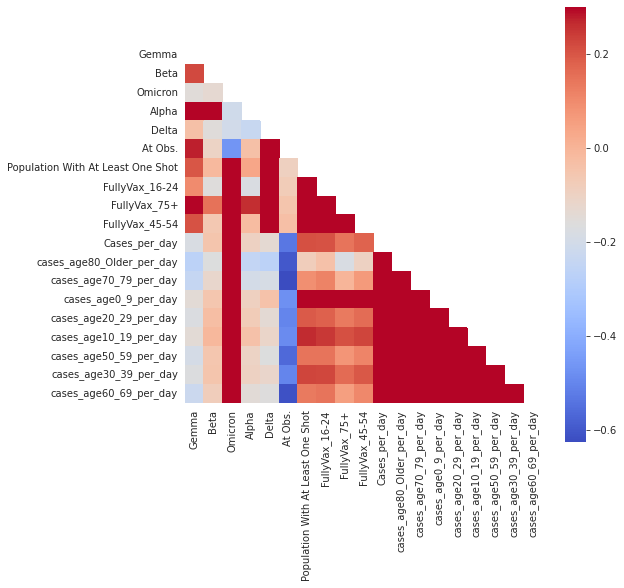

In [ ]:
# Make the columns in a different sequence
m_df_ts_corr = m_df_ts_full[[
 'Gemma',
 'Beta',
 'Omicron',
 'Alpha',
 'Delta',
 'At Obs.',
 'Population With At Least One Shot',
 'FullyVax_16-24',
 'FullyVax_75+',
 'FullyVax_45-54',
 'Cases_per_day',
 'cases_age80_Older_per_day',
 'cases_age70_79_per_day',
 'cases_age0_9_per_day',
 'cases_age20_29_per_day',
 'cases_age10_19_per_day',
 'cases_age50_59_per_day',
 'cases_age30_39_per_day',
 'cases_age60_69_per_day']
]

# Create a corelation matrix
correlated_variables = set()
correlation_matrix = m_df_ts_corr.corr()

# Visualize the correlation matrix in a heatmap
mask = np.zeros_like(correlation_matrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    f, ax = plt.subplots(figsize=(8, 8))
    ax = sns.heatmap(correlation_matrix, mask=mask, vmax=.3, square=True,
                     xticklabels='auto', yticklabels='auto', cmap='coolwarm')
    
# Diffiicult to distinguish variables in terms of their correlations. Can cause problems
# when we interprete the model!!!!!!!

## Model Comparison
Compare model performance on the forecasted data (120 records).

In [ ]:
# Import predicted data
df_pred = pd.read_excel('CT prediction/visualize_pred.xlsx')

In [ ]:
# Compare the data of the best model with Omicron with the actual
# The model crashes in the period of validation
df_pred_vis = pd.concat([df_projectCT_s, df_pred], axis=1)

fig = px.line(df_pred_vis, x='YearMonthDay', y=['BestModel_withOmic', 'Deaths_per_day'],
              title='Time Series of Deaths: Actual vs the Best Model with Omicron')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [ ]:
# Compare the data of the best model with the actual
# The predicted looks aligned with the actual
df_pred_vis = pd.concat([df_projectCT_s, df_pred], axis=1)

fig = px.line(df_pred_vis, x='YearMonthDay', y=['BestModel', 'Deaths_per_day'],
              title='Time Series of Deaths Actual vs the Best Model')
fig.update_xaxes(rangeslider_visible=True)
fig.show()